# INTERPOLATION ASSIGNMENT (Homework 1) SOLUTION

***PHY781: Numerical and Computational Methods,***  
**Department of Physics,**  
**University of Ibadan**

**Submission Due Date: July 22, 2024**  
*Submission by: Victor A. Adeyemi*

## Homework 1

Collect monthly highest and lowest average temperatures for one of these cities: Ibadan, Lagos, Abuja, Accra, Yaounde.  
For your chosen city,  

> a) Using linear interpolation, determine  
    I. the highest temperature on your birth date and estimate the accuracy of your result for 2023  
    II. the lowest temperature on your birth date and estimate the accuracy of your result for 2023

> b) Write a Python code that performs Lagrangian Interpolation and use this code to repeat 
question (a) above

> c) Write a Python code that performs a polynomial approximation and use it to determine the 
date when the average temperature was  
    I. Highest in 2023  
    II. Lowest in 2023

> d) Plot the data points alongside your polynomial approximation in (c) above

> e) Represent the data using linear combinations of sine/cosine. Determine the appropriate 
coefficients using a least square fitting approachs.

## 1.0 Data Collection

***[Climate Data](https://en.tutiempo.net/climate/01-2023/ws-652010.html)*** was collected for Lagos/Ikeja 2023  
Latitude: 6.58 | Longitude: 3.33 | Altitude: 40


**Note:**  
- *Average temperature on September 5, 2023 was 26.2 $^0$C*
- *Highest temperature on September 5, 2023 was 28 $^0$C*
- *Lowest temperature on September 5, 2023 was 23.8 $^0$C*

## 1.1 Lagrange Interpolation Implementation

Here, the task is to implement the Lagrange interpolation function, $f(x_n)$ at $x_n$ given by:

$$f(x_n) = \sum_{i=1}^{N}f_i\lambda_i(x_n) \tag{1.1}$$

*where*

$$\lambda_i(x_n) = \prod_{{j=1},{j \neq i}}^N \frac{(x_n-x_j)}{(x_i-x_j)} \tag{1.2}$$

**so that,**

$$f(x_n)=\sum_{i=1}^{N}f_i\left[\prod_{{j=1},{j \neq i}}^N \frac{(x_n-x_j)}{(x_i-x_j)}\right] \tag{1.3}$$

In [1]:
# define function to implement the lagrange formula
def lagrange(x, f, x_n):
    """
    Implements lagrange interpolation

    Args:
        x (list/array): numerical values for associated datapoints (months of the year 2023)
        f (list/array): values at each datapoint (average temperature values corresponding to each month in ⁰C).
        x_n (float): numerical value corresponding to datapoint for interpolation (birth date)

    Returns:
        y (float): expected value from interpolation (average temperature value for birth date provided)
    """
    y = 0
    for i in range(len(x)):
        lagr_lambda = 1
        for j in range(len(x)):
            if i != j: #to avoid trivial or undefined solution
                lagr_lambda *= (x_n - x[j]) / (x[i] - x[j])
        y += f[i] * lagr_lambda
    return y         

### Use class exercise to test lagrange interpolation function

In [2]:
# class example dataset to test lagrange implementation
x = [0.0, 1.0, 2.0, 3.0, 4.0]
f = [1.0, 3.0, 4.0, 2.0, 5.5]

In [3]:
# call function on class example dataset and check interpolation for various values of x_n
check = [[2.3, 3.53], [2.5, 3.09], [1.0,3.0]]

for x_n, f_class in check:
    f_n = lagrange(x, f, x_n)
    
    percent_error = ((f_n - f_class)/f_class) * 100
    
    print(f"value of function at \033[1m{x_n}\033[0m using our implemented lagrange interpolation is \033[1m{f_n:.2f}\033[0m to 2dp")
    print(f"expected value is \033[1m{f_class}\033[0m")
    print(f"Percentage error is \033[1m{percent_error:.2f}%\033[0m \n")

value of function at 2.3 using our implemented lagrange interpolation is 3.53 to 2dp
expected value is 3.53
Percentage error is 0.04% 

value of function at 2.5 using our implemented lagrange interpolation is 3.09 to 2dp
expected value is 3.09
Percentage error is -0.01% 

value of function at 1.0 using our implemented lagrange interpolation is 3.00 to 2dp
expected value is 3.0
Percentage error is 0.00% 



**The results above shows that the Lagrange Interpolation function was well implemented relative to values collected from class exercise.**  
We shall now proceed to use the implemented function to answer assignment questions

## 1.2 Solution to question(a)

> a) Using linear interpolation, determine  
I. the highest temperature on your birth date and estimate the accuracy of your result for 2023   
II. the lowest temperature on your birth date and estimate the accuracy of your result fo 2023

Linear interpolation of a function $f(x)$ at the point $x$ is given by the relation:   

$$f(x) = f_m + \frac{(x- x_m)}{(x_n - x_m)} (f_n - f_m) \tag{1.4}$$

*where* $[x_m,x_n]$ is a small interval (the smallest interval) which contains $x$ in the given dataset; and $f(x_i) = f_i$

With the datasets provided above, using **linear interpolation**, we shall proceed to find:
1. the *highest* temperature on my birth date (5th September) and estimate the accuracy of your result for 2023
2. the *lowest* temperature on my birth date (5th September) and estimate the accuracy of your result for 2023

#### 1.2.1 highest temperature on my birth date (5th September)

Representing September 5th as $9 + \frac{5}{30} = 9.167$ to 3dp, we have from `Eq.(1.4)` that $x=9.167$.  
Since highest temperature on September 5, 2023 was $28^0C$, we expect to have $f(x) = 28$.  

Using the interval $[9,10]$ from the datasets for TM_average (monthly highest average temperatures), we shall have that,  

$(x_m,f_m) = (9,28.2)$, and $(x_n,f_n) = (10,29.4)$

so that `Eq. (1.4)` becomes:  

$$f(x=9.167) = 28.2 + \frac{(9.167-9)}{(10-9)}(29.4 - 28.2) \tag{1.5}$$
$$= 28.2 + (0.167)(1.2)$$
$$= 28.2 + 0.2004$$
$$=28.4$$ 

$i.e. f_{9.167} = 28.4$ for highest temperature.  
`Note: expected value is 28`

##### Estimating accuracy

Using the fact that $accuracy = (100 - \text{Error rate} )\%$, and
$$\text{Error rate} = \frac{\text{calculated value} - \text{true value}}{\text{true value}} \times100\% \tag{1.6}$$
$$ = \frac{28.4 - 28}{28} \times100\%$$
$$ = 1.43\%$$

We have,

$$accuracy = (100 - 1.43)\%$$
$$ = 98.57\% $$

#### 1.2.2 lowest temperature on my birth date (5th September)

Representing September 5th as $9 + \frac{5}{30} = 9.167$ to 3dp, we have from `Eq.(1.4)` that $x=9.167$.  
Since lowest temperature on September 5, 2023 was $23.8^0C$, we expect to have $f(x) = 23.8$.  

Using the interval $[9,10]$ from the datasets for Tm_average (monthly lowest average temperatures), we shall have that,  

$(x_m,f_m) = (9,24.5)$, and $(x_n,f_n) = (10,25.1)$

so that `Eq. (1.4)` becomes:  

$$f(x=9.167) = 24.5 + \frac{(9.167-9)}{(10-9)}(25.1 - 24.5) \tag{1.7}$$
$$= 24.5 + (0.167)(0.6)$$
$$= 24.5 + 0.10$$
$$=24.6$$ 

$i.e. f_{9.167} = 24.6$ for lowest temperature.  
`Note: expected value is 23.8`

##### Estimating accuracy

Using the fact that $accuracy = (100 - \text{Error rate} )\%$, and
$$\text{Error rate} = \frac{\text{calculated value} - \text{true value}}{\text{true value}} \times100\%  \tag{1.8}$$
$$ = \frac{24.6 - 23.8}{23.8} \times100\%$$
$$ = 3.36\%$$

We have,

$$accuracy = (100 - 3.36)\%$$
$$ = 96.64\% $$

### 1.2.3 Summary
`Highest temperature value from linear interpolation: 28.4⁰C`  
`Expected value: 28⁰C`  
`Estimated accuracy = 98.57%`


`Lowest temperature value from linear interpolation: 24.6⁰C`  
`Expected value: 23.8⁰C`  
`Estimated accuracy = 96.64%`

## 1.3 Solution to question(b)

>  b) Write a Python code that performs Lagrangian Interpolation and use this code to repeat question (a) above

Using the *Lagrange interpolation* function implemented above, ***`function: lagrange(x, f, x_n)`***, we shall proceed to repeat the procedure in (a) above using python code.

In [4]:
#collected data set
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
x_mon=[1,2,3,4,5,6,7,8,9,10,11,12]
TM_ave = [29.5,32.2,29.7,29.8,30.1,28.8,27.7,27.4,28.2,29.4,31.5,30.3] #monthly highest average temperatures ⁰C for 2023
Tm_ave = [27,28.4,27.1,26.1,25.8,25.2,24.3,25.4,24.5,25.1,24.6,27.1] #monthly lowest average temperatures in ⁰C for 2023

In [5]:
#define birthdate
x_birthDate = 9 + (5/30) #for 5th September

#define expected result
f_TM_expected = 28 #Highest temperature in ⁰C as at birthdate 
f_Tm_expected = 23.8 #Lowest temperature in ⁰C as at birthdate

# call lagrange function for interpolation
f_TM = lagrange(x_mon, TM_ave, x_birthDate) #Highest temp on Sept 5th
f_Tm = lagrange(x_mon, Tm_ave, x_birthDate) #Lowest temp on Sept 5th

# compute estmated accuracy
error_TM = ((f_TM - f_TM_expected)/f_TM_expected) * 100 #error rate for highest temp
accuracy_TM = 100 - error_TM #estimated accuracy for highest temp

error_Tm = ((f_Tm - f_Tm_expected)/f_Tm_expected) * 100 #error rate for lowest temp
accuracy_Tm = 100 - error_Tm #estimated accuracy for lowest temp

print(f"Highest temperature on \033[1m5th September, 2023\033[0m using implemented lagrange interpolation is \033[1m{f_TM:.1f}⁰C\033[0m to 1dp")
print(f"Expected value: \033[1m{f_TM_expected}⁰C\033[0m")
print(f"Estimated accuracy: \033[1m{accuracy_TM:.2f}%\033[0m \n")

print(f"Lowest temperature on \033[1m5th September, 2023\033[0m using implemented lagrange interpolation is \033[1m{f_Tm:.1f}⁰C\033[0m to 1dp")
print(f"Expected value: \033[1m{f_Tm_expected}⁰C\033[0m")
print(f"Estimated accuracy: \033[1m{accuracy_Tm:.2f}%\033[0m \n")

Highest temperature on 5th September, 2023 using implemented lagrange interpolation is 28.4⁰C to 1dp
Expected value: 28⁰C
Estimated accuracy: 98.49% 

Lowest temperature on 5th September, 2023 using implemented lagrange interpolation is 24.2⁰C to 1dp
Expected value: 23.8⁰C
Estimated accuracy: 98.43% 



## 1.4 Solution to question(c & d)

> c) Write a Python code that performs a polynomial approximation and use it to determine the 
date when the average temperature was  
    I. Highest in 2023  
    II. Lowest in 2023

> d) Plot the data points alongside your polynomial approximation in (c) above

### 1.4.1 Python code implentation

Here, we shall proceed to write a Python code that performs a polynomial approximation and use it to determine the date when the average temperature was  
I. Highest in 2023  
II. Lowest in 2023

We shall use a plot of the polynomial approximation to determine highest and lowest average temperature in 2023.

In [6]:
import random as rand

# Step 1: Choose random datapoints from collected dataset for polynomial approximation
# Ensure that random points bracket the desired point of interpolation 

# dataset
x_mon=[1,2,3,4,5,6,7,8,9,10,11,12]
TM_ave = [29.5,32.2,29.7,29.8,30.1,28.8,27.7,27.4,28.2,29.4,31.5,30.3] #monthly highest average temperatures ⁰C for 2023
Tm_ave = [27,28.4,27.1,26.1,25.8,25.2,24.3,25.4,24.5,25.1,24.6,27.1] #monthly lowest average temperatures in ⁰C for 2023

def new_data(degree,x, f, bracket = []):
    """
    generates random sample points for polynomial approximation

    Args:
        degree (type: int): degree of polynomial
        x (type: list): x values in dataset
        f (type: list): f values in dataset
        bracket (type: list), default = []: desired position interval [i, j], where the ith and jth x values bracket interpolation point.
                                            Note: x[2] and x[5] are the 3rd and 6th x values respectively.

    Returns:
        A list of two lists containing corresponding new x and f values suitable to generate polynomial of degree "degree".
    """

    rand.seed(58) #for reproducibility of results since ramdomness was introduced
    
    # define exceptions for new dataset sampling
    if (degree >= len(x)):
        raise Exception(f"degree {degree} not allowed. Degree must be less than number of datapoints")
    if (len(x) != len(f)):
        raise Exception("xvalues list and fvalue list must be of equal length")
    for i in bracket:
        if i >= len(x):
            raise Exception(f"dataset list out of index. There is no datapoint on the {i}th position")
    if bracket == []:
        sample_points = bracket
    elif bracket[0] == bracket[1]:
        raise Exception("same datapoint position chosen to bracket interpolation point")
    else:
        sample_points = bracket
    
    while len(sample_points) < degree+1:
        a = rand.randint(0, len(x)-1)
        while sample_points.count(a) == 0:
            sample_points.append(a)
    
    sample_points.sort()
    
    new_x = []
    new_f = []
    
    for i in sample_points:
        x_data = x[i]
        f_data = f[i]
        new_x.append(x_data)
        new_f.append(f_data)
    data = [new_x, new_f]
    return data

In [7]:
# step 2: Use new datasets from I above to fit the data to the desired degree

def polyfit(degree, dataset):
    """
    Uses lagrange interpolation to fit data to choice degree of polynomial approximation

    Args:
        degree (type: int): degree of polynomial
        dataset (type: list): A list of 3 lists.
                              First 2 lists contain corresponding x and f suitable to generate polynomial of degree "degree".
                              Third list contains 2 indices to bracket a desired interpolation point, where necessary
    Returns:
        A list of two lists containing corresponding interpolated values of x and f suitable to be shown as a plot.
    """

    x = dataset[0]
    f = dataset[1]
    brac = dataset[2]
    
    # use new_data function to select random dataset for 
    fit_data = new_data(degree, x, f, brac)
    new_x = fit_data[0]
    new_f = fit_data[1]
    
    # use lagrange interpolation function to generate data for polynomial curve
    xmin = x[0]
    xmax = x[-1]
    delta = 0.1
    N = int((xmax -xmin)/delta + 1)
    xtemp = xmin

    x_graph = []
    f_graph = []

    for i in range(N):
        ftemp = round(lagrange(new_x, new_f, xtemp), 4)
        f_graph.append(ftemp)
        xtemp = round(xtemp, 1)
        x_graph.append(xtemp)
        xtemp += delta
    fit = [x_graph, f_graph]
    return fit

In [8]:
#Step 3: Use the polyfit function from II above for plot

def plotpoly(degree, plotdata):
    """
    shows plot for choice degree of polynomial approximation

    Args:
        degree (type: int): degree of polynomial
        plotdata (type: list): A list for monthly datasets as required "polyfit" function

    Returns:
        Plot
    """
    #choose degree and plot polynomial
    result = polyfit(degree, plotdata)
    
    # plot polynomial approximation
    plt.plot(result[0], result[1], label=f"Degree {degree} approx. for average temp.") #this shows line graph of polynomial approximation
    plt.legend()

### 1.4.2: Show plots of Polynomial Approximation

The implementation above has been done in 3 steps:
- Step I: Choosing random datapoints from collected dataset for polynomial approximation {`function: newdata(degree,x, f, bracket = [])`}
- Step II: Using new datasets from I above to fit the data to the desired degree {`function: polyfit(degree, dataset)`}
- Step III: Using the polyfit function from II above for plot {`function: plotpoly(degree, plotdata)`}

Here, it is important to state as emphasis that the implemented functions for polynomial approximation allows for bracketing a desired point.
The x indices used for bracketing will constrain the polynomial approximation to pass through the datapoints used as indices.
For instance, if the datapoints at index $i$ and $j$, i.e. $[x_i, x_j]$, are used for bracketing, the curve will pass through points $x_i$ and $x_j$. This implementation is considered necessary.

Bearing the above in mind, two sets of plots will be presented in the cells below:
> PLOT I: Plots showing randomly fitted polynomial approximations for degrees 1 to 5, and degree 11  
> PLOT II: Plots showing polynomial approximations for degrees 1 to 5, and degree 11 using index for $[x_{min},x_{max}]$ as bracketed points

##### PLOT I: Plots showing randomly fitted polynomial approximations for degrees 1 to 6

<Figure size 1200x600 with 0 Axes>

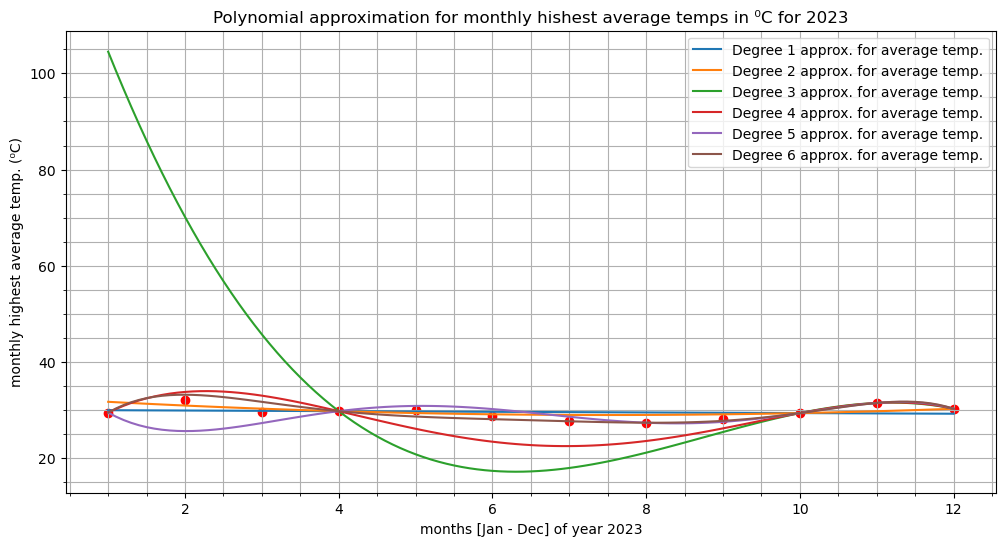

<Figure size 1200x600 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
# dataset to be used, without bracketed point values
TM_data = [x_mon, TM_ave, []]
Tm_data = [x_mon, Tm_ave, []]

plt.figure(figsize=(12,6))
#plot polyapprox for choice degrees for monthly highest average temperature
for degree in range(1,7): #showing plots for only degrees 1 to 6
    plotpoly(degree, TM_data)
plt.xlabel("months [Jan - Dec] of year 2023")
plt.ylabel("monthly highest average temp. (⁰C)")
plt.grid(which = "both") #this adds major and minor gridlines
plt.minorticks_on() #for values on graphs
plt.scatter(x_mon,TM_ave, marker = "o", color = "red", label="monthly highest average temp.")
plt.title(f"Polynomial approximation for monthly hishest average temps in ⁰C for 2023")
plt.figure(figsize=(12,6))

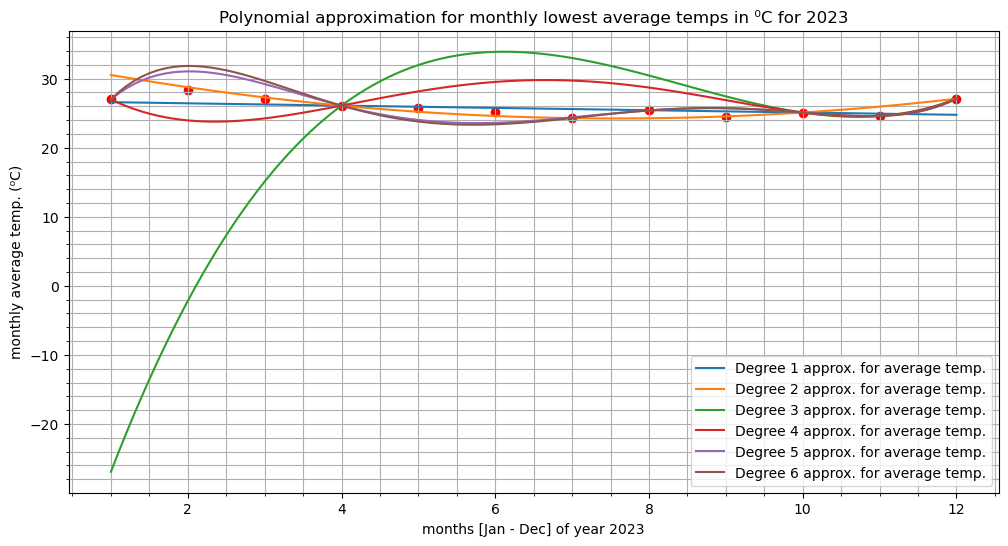

In [10]:
import matplotlib.pyplot as plt
# dataset to be used, without bracketed point values
Tm_data = [x_mon, Tm_ave, []]

plt.figure(figsize=(12,6))
#plot polyapprox for choice degrees for monthly lowest average temperature
for degree in range(1,7): #showing plots for only degrees 1 to 6
    plotpoly(degree, Tm_data)

plt.xlabel("months [Jan - Dec] of year 2023")
plt.ylabel("monthly average temp. (⁰C)")
plt.grid(which = "both") #this adds major and minor gridlines
plt.minorticks_on() #for values on graphs
plt.title(f"Polynomial approximation for monthly lowest average temps in ⁰C for 2023")
plt.scatter(x_mon,Tm_ave, marker = "o", color = "red", label="monthly lowest average temp.")


##### PLOT II: Plots showing polynomial approximations for degrees 1 to 6 using index for $[x_{min},x_{max}]$ as bracketed points

<Figure size 1200x600 with 0 Axes>

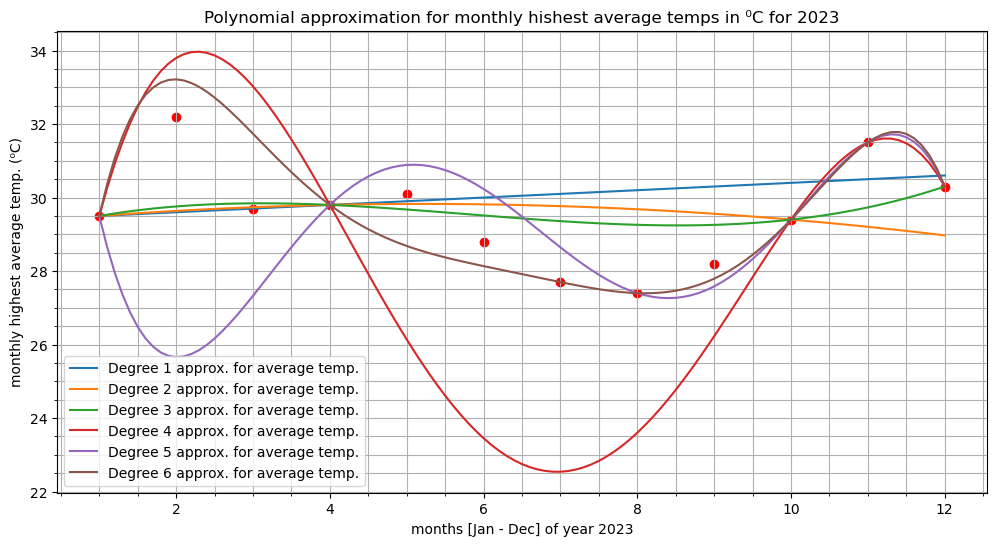

<Figure size 1200x600 with 0 Axes>

In [11]:
# dataset to be used, with bracketed point values
TM_data = [x_mon, TM_ave, [3,0]] # x_min and x_max for highest average temp is indexed at 0 and 3 respectively

plt.figure(figsize=(12,6))
#plot polyapprox for choice degrees for monthly highest average temperature
for degree in range(1,7): #showing plots for only degrees 1 to 6
    plotpoly(degree, TM_data)
plt.xlabel("months [Jan - Dec] of year 2023")
plt.ylabel("monthly highest average temp. (⁰C)")
plt.grid(which = "both") #this adds major and minor gridlines
plt.minorticks_on() #for values on graphs
plt.scatter(x_mon,TM_ave, marker = "o", color = "red", label="monthly highest average temp.")
plt.title(f"Polynomial approximation for monthly hishest average temps in ⁰C for 2023")
plt.figure(figsize=(12,6))

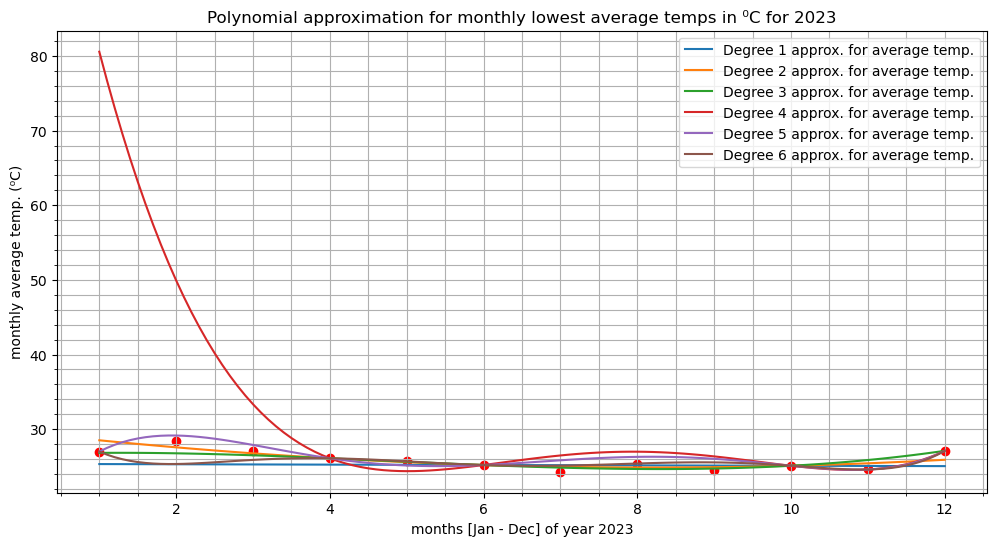

In [12]:
import matplotlib.pyplot as plt
# dataset to be used, without bracketed point values
Tm_data = [x_mon, Tm_ave, [9,5]] # x_min and x_max for lowest average temp is indexed at 5 and 9 respectively

plt.figure(figsize=(12,6))
#plot polyapprox for choice degrees for monthly lowest average temperature
for degree in range(1,7): #showing plots for only degrees 1 to 6
    plotpoly(degree, Tm_data)
plt.xlabel("months [Jan - Dec] of year 2023")
plt.ylabel("monthly average temp. (⁰C)")
plt.grid(which = "both") #this adds major and minor gridlines
plt.minorticks_on() #for values on graphs
plt.title(f"Polynomial approximation for monthly lowest average temps in ⁰C for 2023")
plt.scatter(x_mon,Tm_ave, marker = "o", color = "red", label="monthly lowest average temp.")


### Summary and choice polynomial approximation

**Note:** 

In the plot I above, the datapoints used for different degrees of polynomial approximations were generated randomly (with a seed value for reproducibility).

`From degree 6 polynomial approximation in plot I:`  
**Highest Temperature:** 33.25⁰C  
**Lowest Temperature:** 23.4 ⁰C

In plot II above,

The algorithm has been constructed to allow for two specific points which can bracket any interpolation point. This idea is explored in the results below.

`From degree 6 polynomial approximation in plot II:`

**Highest Temperature:** 33.25 ⁰C  
**Lowest Temperature:** 24.5 ⁰C

*Conclusion: At degree 6, the polynomial approximation is not so efficient.*  

Plots for degrees 1 to 5 only has been shown.

## 1.5 Least squares fit

Here, we shall implement $ f(x) $ for a given dataset $(x_i, y_i)$ by expanding $f(x)$ as a linear combination of a known function of $t$, say $\phi(t)$, whose basis is defined as $\{\phi_\alpha(t)\}_{\alpha=1}^N$, so that

$$f(x = t) = \sum_{\alpha=1}^N a_\alpha \phi_\alpha(t) \tag{1.9}$$

The goal here is to find the co-efficients, $\{a_\alpha\}$.

For example, given our known function, $\phi(t)$ as a polynomial of degree $N$,
$$\{\phi_\alpha(t)\}_{\alpha=1}^N  = \{t^n\}_{n=0}^{N-1} = \{1, t, t^2, t^3 ...,t^{N-1}\} \tag{1.10}$$
and,
$$f(x = t) = a_1 + a_2t + a_3t^2 +...+ a_Nt^{N-1} \tag{1.11}$$


Using the procedure of ***least squares fitting***, we compute for all the co-efficients $a_\beta \in \{a_\alpha\} $ by setting $\frac{\partial\chi^2}{\partial a_\beta} = 0$, where $\chi^2$ is the *total weighted squared error* defined by:

$$\chi^2 = \sum_{i=1}^n w_i{\left[f(x_i) - y_i\right]}^2 \tag{1.12}$$

yielding the system of N equations, *`for a function of degree N, which also implies N co-efficients`*:

$$ \sum_{\alpha = 1}^N\sum_{i=1}^n \phi_\beta(t_i) \phi_\alpha(t_i) w_i = \sum_{i=1}^n y_i \phi_\beta(t_i) w_i \tag{1.13}$$

This can be further simplified as a `N x N` matrix of the form:

$$\sum_{\alpha = 1}^N A_{\beta\alpha} a_{\alpha} = b_{\beta} \tag{1.14}$$

where

$$ A_{\beta\alpha} = \sum_{i=1}^n \phi_\beta(t_i) \phi_\alpha(t_i) w_i \tag{1.15}$$

and

$$ b_\beta = \sum_{i=1}^n y_i \phi_\beta(t_i) w_i \tag{1.16}$$

**Note in the above that:**
- $A_{\beta\alpha} = A_{\alpha\beta}$
- N is the chosen degree of known function
- n is the number of given data points
- an optimal least square fit is achievable with N = n.

## 1.5.1 Solution to question (e)
> e) Represent the data using linear combinations of sine/cosine. Determine the appropriate coefficients using a least square fitting approachs.

The Fourier series is of the form:
$$ s_N(x) = A_0 + \sum_{n=1}^N\left[A_n \cos{\left(2\pi {n\over P}x\right)} + B_n\sin{\left(2\pi {n\over P}x\right)}\right] \tag{1.17}$$

We shall use the form of the series above to construct a function of x, as a linear combination of sine/cosine. Precisely, a chosen form of $f(x)$ is given below:

$$ f(x) = \sum_{n=1,3,...;m=2,4,...}^N\left[a_n \cos{\left(2\pi {n\over T}x\right)} + a_m\sin{\left(2\pi {m\over T}x\right)}\right] \tag{1.17}$$

Using the fact that $\sin{(x)} = \cos{(x - \frac{\pi}{2})}$, `eqn[1.17]` can be rewritten as:

$$ f(x) = \sum_{n=1,3,...;m=2,4,...}^N\left[a_n \cos{\left(2\pi {n\over T}x\right)} + a_m\cos{\left(2\pi {m\over T}x - \frac{\pi}{2}\right)}\right] \tag{1.18}$$

and by further simplification, we can write that:

$$ f(x) = \sum_{\substack{{n=1},\lambda \in \{0,1\} \\ \lambda = 0, \text{ when n is odd}}}^N\left[a_n\cos{\left(2\pi {n\over T}x - \lambda\frac{\pi}{2}\right)}\right] \tag{1.19}$$

so that,

$$\{\phi(t)\}_{n=1}^N = \{\cos{\left(2\pi {n\over T}t - \lambda\frac{\pi}{2}\right)}\}_{n=1}^N \tag{1.20}$$

with $\lambda$ defined as in `eqn[1.19]`

With the choice of $f(x)$ above, we shall now proceed to implement the process to determine appropriate coefficients using the least-square fitting approach.

In [13]:
#dataset
x_mon=[1,2,3,4,5,6,7,8,9,10,11,12]
TM_ave = [29.5,32.2,29.7,29.8,30.1,28.8,27.7,27.4,28.2,29.4,31.5,30.3] #monthly highest average temperatures ⁰C for 2023
Tm_ave = [27,28.4,27.1,26.1,25.8,25.2,24.3,25.4,24.5,25.1,24.6,27.1] #monthly lowest average temperatures in ⁰C for 2023

t = x_mon

In [14]:
# Least Squares Fit
import numpy as np
import scipy as sp

# define phi(t)
def phi(t,n):
    l,T = 0,12
    if n%2 == 0: l = 1
    phi = np.cos((2*np.pi*(n/T)*t) - l*(np.pi)/2)
    return phi

In [15]:
def findCoeff(t,f,phiCount):
    N = len(t)
    M = phiCount # how many phi functions
    A = np.zeros((M,M))
    y = np.zeros(M)
    
    for i in range(N):
        for a in range(0,M): 
            y[a] += f[i]*phi(t[i],a+1) #not interested in phi(t, n = 0)
            for b in range(M):
                A[a,b] += phi(t[i],a+1)* phi(t[i],b+1)         
    my_a = sp.linalg.solve(A,y)
    return my_a

In [16]:
def getfval(myCoeff,xvalue):
    N = len(myCoeff)
    fvalue = 0.0
    for i in range(N):
        fvalue += myCoeff[i]*phi(xvalue,i+1) #not interested in phi(t, n = 0)
    return fvalue

In [17]:
import matplotlib.pyplot as plt
def plotSqFit(myA):   
    xmin = 1.0
    xmax = 12.0
    delta = 0.1
    N = int((xmax -xmin)/delta + 1)
    xtemp = xmin
    
    x_graph = []
    f_graph = []
    
    for i in range(N):
        ftemp = round(getfval(my_A, xtemp), 4)
        f_graph.append(ftemp)
        xtemp = round(xtemp, 1)
        x_graph.append(xtemp)
        xtemp += delta
    fit = [x_graph, f_graph]
    return fit

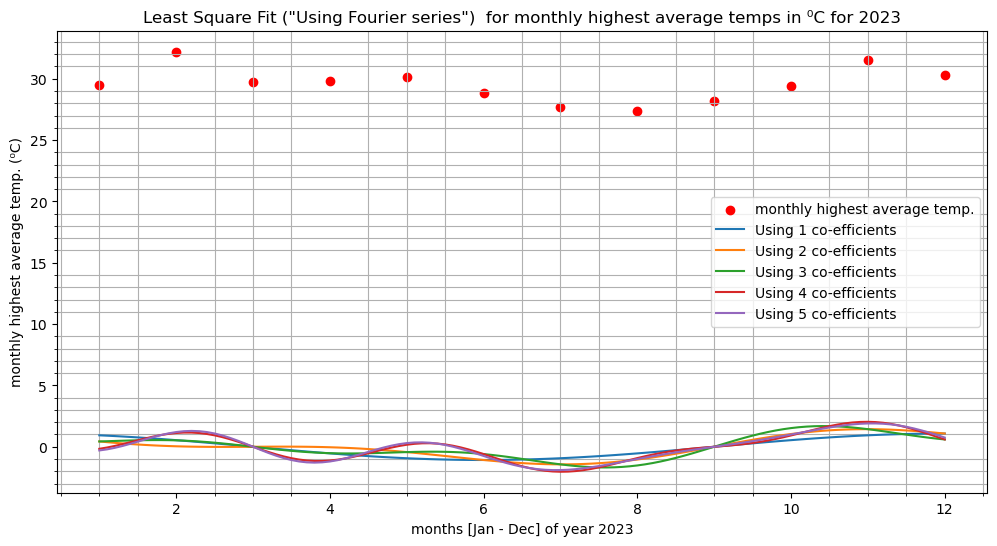

In [18]:
plt.figure(figsize=(12,6))
plt.scatter(x_mon,TM_ave, marker="o", c="r", label = "monthly highest average temp.")
for i in range(1,6):
    my_A = findCoeff(t,TM_ave, i)
    fit = plotSqFit(my_A)
    plt.plot(fit[0],fit[1], label = f"Using {i} co-efficients")
    plt.legend()
plt.xlabel("months [Jan - Dec] of year 2023")
plt.ylabel("monthly highest average temp. (⁰C)")
plt.title(f"Least Square Fit (\"Using Fourier series\")  for monthly highest average temps in ⁰C for 2023")
plt.grid(which = "both") #this adds major and minor gridlines
plt.minorticks_on() #for values on graphs
plt.grid()

By observing the plots above, the desired fit has been shifted by a factor of $a_0$ which was not accounted for in our choice of function.
This is fascinating and reveals that the choice of $a_0$ is indeed important.

Motivated by this, we adjust our $f(x)$ to take the form:

$$ f(x) = a_0 + \sum_{\substack{{n=1},\lambda \in \{0,1\} \\ \lambda = 0, \text{ when n is odd}}}^N\left[a_n\cos{\left(2\pi {n\over T}x - \lambda\frac{\pi}{2}\right)}\right] \tag{1.21}$$

where $a_0 = 29.9 $ (determined heuristically).

adjusting the implementation and yields the curve below.

In [19]:
def getfval(myCoeff,xvalue):
    N = len(myCoeff)
    fvalue = 0.0
    for i in range(N):
        fvalue += myCoeff[i]*phi(xvalue,i+1) #not interested in phi(t, n = 0)
    return fvalue + 29.9 # <------ adjusting the choice function with a0 = 29.9

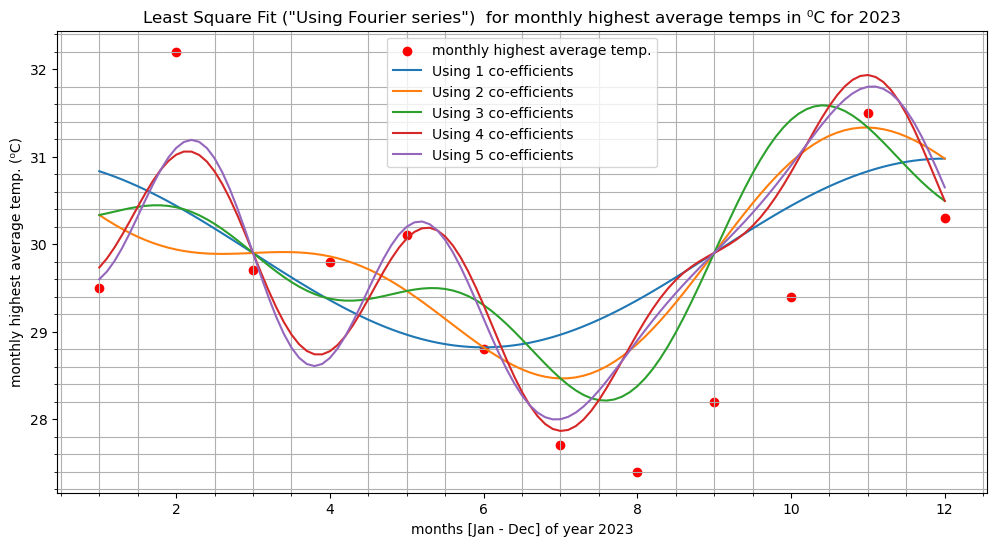

In [20]:
plt.figure(figsize=(12,6))
plt.scatter(x_mon,TM_ave, marker="o", c="r", label = "monthly highest average temp.")
for i in range(1,6):
    my_A = findCoeff(t,TM_ave, i)
    fit = plotSqFit(my_A)
    plt.plot(fit[0],fit[1], label = f"Using {i} co-efficients")
    plt.legend()
plt.xlabel("months [Jan - Dec] of year 2023")
plt.ylabel("monthly highest average temp. (⁰C)")
plt.title(f"Least Square Fit (\"Using Fourier series\")  for monthly highest average temps in ⁰C for 2023")
plt.grid(which = "both") #this adds major and minor gridlines
plt.minorticks_on() #for values on graphs
plt.grid()

### Observations:

- The curve fitting algorithm "explodes" when more than 5 coefficients are required in the known function.
- All the curves coincides twice at 2 points.


Repeating the procedures above for data collected for monthly lowest average temperature yields the curve below:

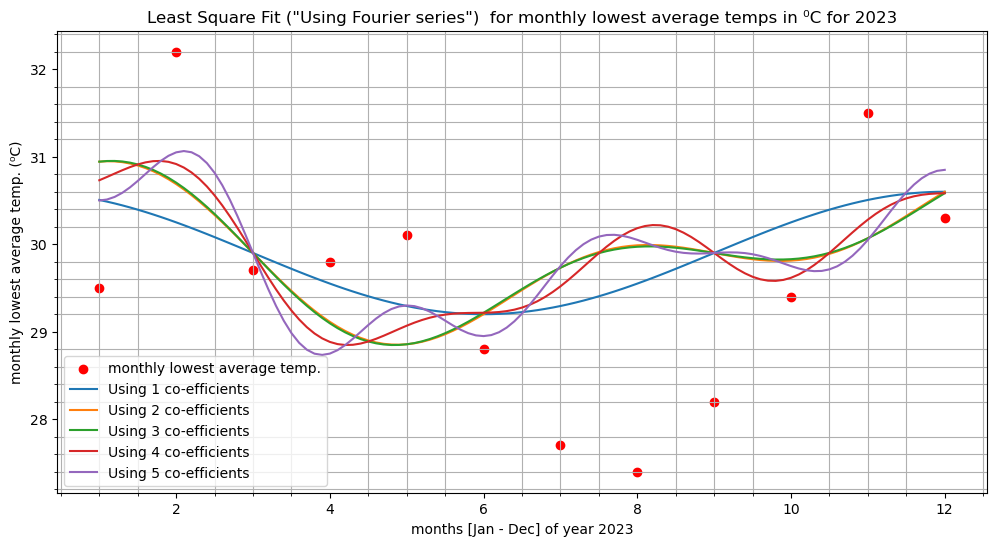

In [21]:
plt.figure(figsize=(12,6))
plt.scatter(x_mon,TM_ave, marker="o", c="r", label = "monthly lowest average temp.")
for i in range(1,6):
    my_A = findCoeff(t,Tm_ave, i)
    fit = plotSqFit(my_A)
    plt.plot(fit[0],fit[1], label = f"Using {i} co-efficients")
    plt.legend()
plt.xlabel("months [Jan - Dec] of year 2023")
plt.ylabel("monthly lowest average temp. (⁰C)")
plt.title(f"Least Square Fit (\"Using Fourier series\")  for monthly lowest average temps in ⁰C for 2023")
plt.grid(which = "both") #this adds major and minor gridlines
plt.minorticks_on() #for values on graphs
plt.grid()

## Contribution

The following colleagues are acknowledged for their useful contributions:
- **Michael Adeniji**: Discussion with him helped with accurate data collection  
- **Peter Ogundipe**: Discussion with him helped with effective function implementation  

Special thanks to **Prof. Janet Ademola** of the Department of Physics. Discussion with her helped with data collection source  
The **class lecture note** and **codes used in exercises** have been of tremendous assistance. Section 1.5 used the code examples in class verbatim.


I affirm that all other works in this submission were solely done by me.